In [55]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Dense, Embedding, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [57]:
# Step 2: Load the dataset
data = pd.read_csv('imdb_master.csv', encoding='latin-1')
print(data.head())

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [60]:
# Step 3: Filter only labeled reviews
data = data[data['label'].isin(['pos', 'neg'])]
texts = data['review'].values
labels = data['label'].map({'pos': 1, 'neg': 0}).values

In [63]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [66]:
# Step 5: Create a text vectorization layer
vectorizer = TextVectorization(max_tokens=10000, output_sequence_length=500)
vectorizer.adapt(X_train)

In [69]:
# Step 6: Build the model
model = Sequential([
    vectorizer,  # Automatically vectorizes input text
    Embedding(input_dim=10000, output_dim=64),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [89]:
# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_2            │ (128, 500)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (128, 500, 64)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (128, 64)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (128, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (128, 1)               │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,225 (2.46 MB)

 Trainable params: 644,225 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5642 - loss: 0.6717 - val_accuracy: 0.7893 - val_loss: 0.4653
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8074 - loss: 0.4295 - val_accuracy: 0.8451 - val_loss: 0.3623
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8541 - loss: 0.3393 - val_accuracy: 0.8767 - val_loss: 0.3109
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8819 - loss: 0.2910 - val_accuracy: 0.8238 - val_loss: 0.3809
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8815 - loss: 0.2845 - val_accuracy: 0.8310 - val_loss: 0.3714


In [77]:
# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8315 - loss: 0.3624
Test Accuracy: 0.83


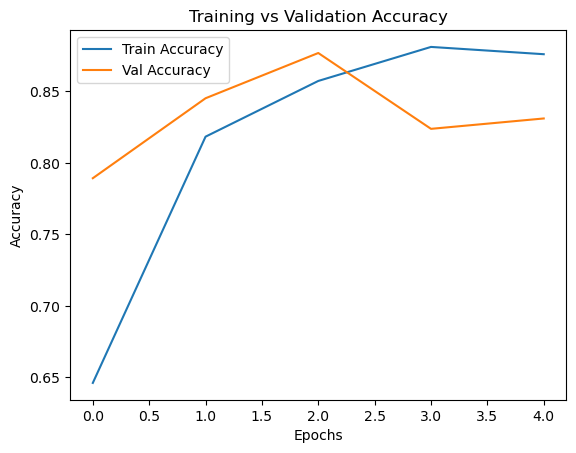

In [78]:
# Step 10: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()